## Exploratory Data Analysis on Superstore Data
A dataset containing the sales and profits of an unknown superstore.

## Introduction


https://www.kaggle.com/vivek468/superstore-dataset-final

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode => Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product.
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

## Importing required packages

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True) 
import squarify

## Loading data into Dataframe

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')
df.head(3)

Row ID        Order ID Order Date   Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
2       3  CA-2016-138688  6/12/2016   6/16/2016  Second Class    DV-13045   

     Customer Name    Segment        Country         City  ... Postal Code  \
0      Claire Gute   Consumer  United States    Henderson  ...       42420   
1      Claire Gute   Consumer  United States    Henderson  ...       42420   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   

   Region       Product ID         Category Sub-Category  \
0   South  FUR-BO-10001798        Furniture    Bookcases   
1   South  FUR-CH-10000454        Furniture       Chairs   
2    West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714  

[3 rows x 21 columns]

In [3]:
print(df.shape)

(9994, 21)


Total record in dataset = 9994<br> Columns in the dataset = 21

## Data Pre-processing

In [4]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Checking for null values.

In [5]:
df.duplicated().sum()

0

No null & duplicate value found in features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df = df.drop("Row ID", axis=1)

In [8]:
tmp_features = ['Order Date', 'Ship Date']
for f in tmp_features:
    df[f] = df[f].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

"Order Date" and "Ship Date" dtype is changed.

In [9]:
tmp_features = ['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
for f in tmp_features:
    df[f] = df[f].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   category      
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   category      
 4   Customer ID    9994 non-null   category      
 5   Customer Name  9994 non-null   category      
 6   Segment        9994 non-null   category      
 7   Country        9994 non-null   category      
 8   City           9994 non-null   category      
 9   State          9994 non-null   category      
 10  Postal Code    9994 non-null   category      
 11  Region         9994 non-null   category      
 12  Product ID     9994 non-null   category      
 13  Category       9994 non-null   category      
 14  Sub-Category   9994 non-null   category      
 15  Product Name   9994 n

Other columns dtype is changed to "category".

### Data Analysis

In [10]:
df.head(3)

Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16  Second Class    DV-13045   

     Customer Name    Segment        Country         City       State  \
0      Claire Gute   Consumer  United States    Henderson    Kentucky   
1      Claire Gute   Consumer  United States    Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   

  Postal Code Region       Product ID         Category Sub-Category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

The "Profit" column has some negative values. They are loses. Let's analyze them. 

In [11]:
df_loses = df[df["Profit"] <= 0]

In [12]:
df_loses.shape

(1936, 20)

The number of products with negative or 0 profits is 1936.

In [13]:
df_loses.head(3)

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
3   US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
14  US-2015-118983 2015-11-22 2015-11-26  Standard Class    HP-14815   
15  US-2015-118983 2015-11-22 2015-11-26  Standard Class    HP-14815   

     Customer Name      Segment        Country             City    State  \
3   Sean O'Donnell     Consumer  United States  Fort Lauderdale  Florida   
14   Harold Pawlan  Home Office  United States       Fort Worth    Texas   
15   Harold Pawlan  Home Office  United States       Fort Worth    Texas   

   Postal Code   Region       Product ID         Category Sub-Category  \
3        33311    South  FUR-TA-10000577        Furniture       Tables   
14       76106  Central  OFF-AP-10002311  Office Supplies   Appliances   
15       76106  Central  OFF-BI-10000756  Office Supplies      Binders   

                                         Product Name     Sales  Quantity  \
3       Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
14  Holmes Replacement Filter for HEPA Air Cleaner...   68.8100         5   
15   Storex DuraTech Recycled Plastic Frosted Binders    2.5440         3   

    Discount   Profit  
3       0.45 -383.031  
14      0.80 -123.858  
15      0.80   -3.816

In [14]:
df_loses.Profit.sum().round(2)

-156131.29

In [15]:
df_loses.groupby("Product Name").agg('sum').sort_values(by="Profit").head(10)

Sales  Quantity  \
Product Name                                                              
Cubify CubeX 3D Printer Double Head Print            6299.979         7   
GBC DocuBind P400 Electric Binding System            4899.564        16   
Lexmark MX611dhe Monochrome Laser Printer           13769.919        16   
GBC Ibimaster 500 Manual ProClick Binding System     6696.624        31   
GBC DocuBind TL300 Electric Binding System           4395.251        18   
Cubify CubeX 3D Printer Triple Head Print            7999.980         4   
Fellowes PB500 Electric Punch Plastic Comb Bind...   2287.782         9   
Chromcraft Bull-Nose Wood Oval Conference Table...   8264.700        24   
Ibico EPK-21 Electric Binding System                 1889.990         5   
Bush Advantage Collection Racetrack Conference ...   6151.045        25   

                                                    Discount     Profit  
Product Name                                                             
Cubify CubeX 3D Printer Double Head Print               1.40 -9239.9692  
GBC DocuBind P400 Electric Binding System               2.30 -6859.3896  
Lexmark MX611dhe Monochrome Laser Printer               1.50 -5269.9690  
GBC Ibimaster 500 Manual ProClick Binding System        4.30 -5098.5660  
GBC DocuBind TL300 Electric Binding System              2.90 -4162.0336  
Cubify CubeX 3D Printer Triple Head Print               0.50 -3839.9904  
Fellowes PB500 Electric Punch Plastic Comb Bind...      1.60 -3431.6730  
Chromcraft Bull-Nose Wood Oval Conference Table...      1.40 -3107.5272  
Ibico EPK-21 Electric Binding System                    0.80 -2929.4845  
Bush Advantage Collection Racetrack Conference ...      2.45 -2545.2600

In [16]:
loses = df_loses.groupby("Product Name").agg('sum').sort_values(by="Profit").reset_index().head(10)
fig = px.bar(loses, x='Product Name', y='Profit', title="The worst products")
fig.show()

Top 10 products that caused the most losses.

In [17]:
cities = df_loses.groupby("City").sum().sort_values(by='Profit').head(10).reset_index()
cities

City       Sales  Quantity  Discount      Profit
0   Philadelphia  72620.3450       910    116.30 -19590.7411
1        Houston  38565.3744       691    104.74 -14785.3668
2        Chicago  20637.1860       550     88.80 -11120.6271
3    San Antonio  17952.7300       144     17.40  -7831.0254
4      Lancaster   7870.0280        72      9.70  -7632.4946
5     Burlington  12044.8740        19      2.00  -5999.3318
6         Dallas   9994.0562       280     39.30  -4208.5218
7   Jacksonville  33950.1910       159     19.05  -4059.9857
8  New York City  21713.4320       160     12.20  -3966.0226
9     Louisville   2884.7840        35      4.90  -3694.1045

Top 10 branches with losses.<br>  In total, 531 stores suffered losses (-156,131.29). The Philadelphia branch lost the most in sales: -19,590.74.

In [18]:
fig = px.bar(cities, x='City', y='Profit', title='Losses by cities')
fig.show()

**Sales with profits**

In [19]:
df = df[df["Profit"] > 0]

In [20]:
df.head(3)

Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16  Second Class    DV-13045   

     Customer Name    Segment        Country         City       State  \
0      Claire Gute   Consumer  United States    Henderson    Kentucky   
1      Claire Gute   Consumer  United States    Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   

  Postal Code Region       Product ID         Category Sub-Category  \
0       42420  South  FUR-BO-10001798        Furniture    Bookcases   
1       42420  South  FUR-CH-10000454        Furniture       Chairs   
2       90036   West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

In [21]:
df.describe().T

count        mean         std     min       25%      50%  \
Sales     8058.0  223.480623  600.340641  0.9900  17.94000  50.9650   
Quantity  8058.0    3.794738    2.244696  1.0000   2.00000   3.0000   
Discount  8058.0    0.081044    0.098884  0.0000   0.00000   0.0000   
Profit    8058.0   54.917884  213.713980  0.0628   5.32455  13.3176   

                75%        max  
Sales     191.97600  17499.950  
Quantity    5.00000     14.000  
Discount    0.20000      0.400  
Profit     40.46555   8399.976

Summary descriptive statistics.

In [22]:
px.scatter(df, x="Order Date", y="Sales", color="Profit", title="Sales Distribution", render_mode='webgl')

**Sales by Regions**

In [23]:
df.groupby('Region').agg('sum').sort_values(by='Sales', ascending=False)

Sales  Quantity  Discount       Profit
Region                                               
West     641746.6235     10950    229.85  131139.4098
East     509215.9260      8550    164.50  141113.3875
Central  355822.9170      5932    148.90   96021.2475
South    294021.3920      5146    109.80   74254.2626

Total sales are higher in the West and the East. Accordingly, there are more total profit.

In [24]:
fig = px.bar(df, x='Region', y ='Sales', color='Category')
fig.show()

In all regions, the share of Technology is higher in sales.

**Sales by States**

In [25]:
df.groupby('State').sum().sort_values(by='Sales', ascending=False).head(10)

Sales  Quantity  Discount      Profit
State                                                  
California  415409.2655      7255    124.05  80151.0522
New York    282163.2910      4036     47.80  79069.6864
Washington  132841.3420      1806     28.80  33790.5223
Michigan     75767.8040       943      1.80  24463.1876
Virginia     69868.9700       870      0.00  18597.9504
Texas        65134.0080      1842     99.70  11083.8312
Indiana      53549.4200       575      0.00  18382.9363
Georgia      49095.8400       705      0.00  16250.0433
Illinois     40812.7250       888     47.40   6893.8105
Florida      40072.9120       885     50.40   5290.5278

The list of Top 10 states by sales. California leads with a profit of 80,151.05.

**Sales by Cities**

In [26]:
df.groupby('City').sum().sort_values(by='Sales', ascending=False).head(10)

Sales  Quantity  Discount      Profit
City                                                     
New York City  234654.729      3257     39.20  66003.0063
Los Angeles    160363.606      2723     47.60  31611.0879
Seattle        113956.790      1516     24.40  29541.2676
San Francisco   99342.638      1839     28.85  18849.1535
San Diego       42784.447       620     11.35   6665.8967
Detroit         42446.944       441      0.80  13181.7908
Springfield     37031.214       520      8.80   9368.9202
Philadelphia    36456.668      1071     59.20   5752.9737
Columbus        29384.446       636     14.20   7914.9880
Chicago         27902.355       582     31.70   4466.0583

The list of Top 10 cities.

In [27]:
px.violin(df, y="Sales", x="City", color="Region", box=True, points="all", title="Distribution of Sales by City", hover_data=df.columns)

In [28]:
df.groupby('Postal Code').sum().sort_values(by='Sales', ascending=False).head(10)

Sales  Quantity  Discount      Profit
Postal Code                                           
10035        71348.083       910     10.70  16877.7281
10024        70838.688       782     10.00  23736.5040
10009        53189.314       830     10.90  14041.4131
94122        45667.092       751     12.45   8456.3386
98115        40233.140       410      6.80  13360.8079
10011        39278.644       735      7.60  11347.3611
98105        39195.636       594     10.20   8890.4154
90049        36148.638       556      9.30   7911.8543
98103        34528.014       512      7.40   7290.0443
90045        33983.024       474      9.50   6599.0910

Top 10 sorted by Postal Codes.

**Products Category**

In [29]:
df_seg = pd.DataFrame(df.groupby('Segment').sum().sort_values(by='Sales', ascending=False)).reset_index()
df_seg

Segment        Sales  Quantity  Discount       Profit
0     Consumer  895785.9910     15746    338.85  219064.9204
1    Corporate  568564.0255      9344    203.95  136766.3416
2  Home Office  336456.8420      5488    110.25   86697.0454

In [30]:
fig = px.histogram(df, x="Segment", y="Profit")
fig.show()

The Consumer Segment has more sales and profit.

In [31]:
df_cat = df.groupby('Category').agg('sum').sort_values(by='Sales', ascending=False).reset_index()
df_cat

Category        Sales  Quantity  Discount       Profit
0       Technology  716701.1480      5957    153.80  184034.8663
1  Office Supplies  618988.7490     19370    400.40  179106.0593
2        Furniture  465116.9615      5251     98.85   79387.3818

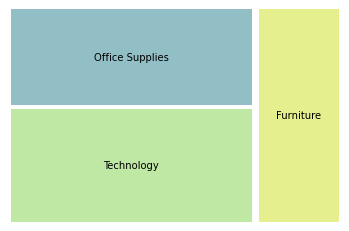

In [32]:
squarify.plot(sizes=df_cat['Sales'], label=df_cat['Category'], alpha=.5, pad=True)
plt.axis('off');

The Technology category has a sales volume of 716,701.15 and a profit of 184,034.866.<br> Next comes the Office Supplies category with slightly lower profit.

In [33]:
df.groupby('Product Name')['Sales'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).reset_index().head(10)

Product Name        sum  count
0              Canon imageCLASS 2200 Advanced Copier  61599.824      5
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  25165.602      8
2               Hewlett Packard LaserJet 3310 Copier  18839.686      8
3  HP Designjet T520 Inkjet Large Format Printer ...  15749.910      2
4         GBC DocuBind TL300 Electric Binding System  15428.228      7
5   3D Systems Cube Printer, 2nd Generation, Magenta  14299.890      2
6               Ibico EPK-21 Electric Binding System  13985.926      2
7                            Samsung Galaxy Mega 6.3  13943.668      6
8        High Speed Automatic Electric Letter Opener  13100.240      2
9          GBC DocuBind P400 Electric Binding System  13065.504      3

List of top 10 products that brought in the most money.<br> Since Technology is the most profitable category, Let's try to find the most profitable items in this category.

In [34]:
df_tech = df[df.Category =='Technology'].sort_values(by="Profit", ascending=False).reset_index()
df_tech.head(3)

index        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0   6826  CA-2016-118689 2016-10-02 2016-10-09  Standard Class    TC-20980   
1   8153  CA-2017-140151 2017-03-23 2017-03-25     First Class    RB-19360   
2   4190  CA-2017-166709 2017-11-17 2017-11-22  Standard Class    HL-15040   

  Customer Name    Segment        Country       City  ... Postal Code  \
0  Tamara Chand  Corporate  United States  Lafayette  ...       47905   
1  Raymond Buch   Consumer  United States    Seattle  ...       98115   
2  Hunter Lopez   Consumer  United States     Newark  ...       19711   

    Region       Product ID    Category Sub-Category  \
0  Central  TEC-CO-10004722  Technology      Copiers   
1     West  TEC-CO-10004722  Technology      Copiers   
2     East  TEC-CO-10004722  Technology      Copiers   

                            Product Name     Sales  Quantity  Discount  \
0  Canon imageCLASS 2200 Advanced Copier  17499.95         5       0.0   
1  Canon imageCLASS 2200 Advanced Copier  13999.96         4       0.0   
2  Canon imageCLASS 2200 Advanced Copier  10499.97         3       0.0   

      Profit  
0  8399.9760  
1  6719.9808  
2  5039.9856  

[3 rows x 21 columns]

Technology Category has 1573 records.

In [35]:
df_tech.groupby('Product Name').sum().sort_values(by='Profit', ascending=False).head(10)

index      Sales  \
Product Name                                                           
Canon imageCLASS 2200 Advanced Copier               28217  61599.824   
Hewlett Packard LaserJet 3310 Copier                41436  18839.686   
HP Designjet T520 Inkjet Large Format Printer -...  15114  15749.910   
Canon PC1060 Personal Laser Copier                  25175  11619.834   
Ativa V4110MDD Micro-Cut Shredder                    6211   7699.890   
3D Systems Cube Printer, 2nd Generation, Magenta    10617  14299.890   
Plantronics Savi W720 Multi-Device Wireless Hea...  36051   9367.290   
Zebra ZM400 Thermal Label Printer                   13210   6965.700   
Hewlett Packard 610 Color Digital Copier / Printer  39103   8899.822   
Plantronics CS510 - Over-the-Head monaural Wire...  59199  10822.360   

                                                    Quantity  Discount  \
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier                     20       0.6   
Hewlett Packard LaserJet 3310 Copier                      38       1.6   
HP Designjet T520 Inkjet Large Format Printer -...         9       0.0   
Canon PC1060 Personal Laser Copier                        19       0.6   
Ativa V4110MDD Micro-Cut Shredder                         11       0.0   
3D Systems Cube Printer, 2nd Generation, Magenta          11       0.0   
Plantronics Savi W720 Multi-Device Wireless Hea...        24       0.4   
Zebra ZM400 Thermal Label Printer                          6       0.0   
Hewlett Packard 610 Color Digital Copier / Printer        21       1.0   
Plantronics CS510 - Over-the-Head monaural Wire...        35       0.8   

                                                        Profit  
Product Name                                                    
Canon imageCLASS 2200 Advanced Copier               25199.9280  
Hewlett Packard LaserJet 3310 Copier                 6983.8836  
HP Designjet T520 Inkjet Large Format Printer -...   5039.9712  
Canon PC1060 Personal Laser Copier                   4570.9347  
Ativa V4110MDD Micro-Cut Shredder                    3772.9461  
3D Systems Cube Printer, 2nd Generation, Magenta     3717.9714  
Plantronics Savi W720 Multi-Device Wireless Hea...   3696.2820  
Zebra ZM400 Thermal Label Printer                    3343.5360  
Hewlett Packard 610 Color Digital Copier / Printer   3124.9375  
Plantronics CS510 - Over-the-Head monaural Wire...   3085.0325

Top 10 electronics products sold with the highest profit.

**Correlation**

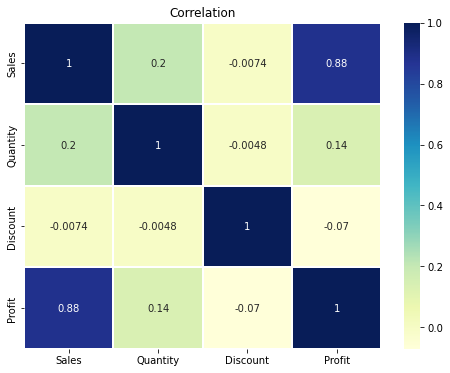

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(),cmap="YlGnBu", annot=True ,linewidths=0.2, linecolor='white')
plt.title("Correlation");

Of course, Sales and Profit have a strong correlation. But no more correlations.

### Conclusion

* Total record in dataset = 9994. Columns in the dataset = 21
* The number of products with negative or 0 profits is 1936.
* In total, 531 stores suffered losses (-156,131.29). The Philadelphia branch lost the most in sales: -19590.7411.
* California has more in sales and leads with a profit of 80151.05.
* Total sales are higher in the West and the East. Accordingly, there are more total profit.
* In all regions, the share of Technology is higher in sales. It has 1573 records. The Technology category has a sales volume of 716,701.15 and a profit of 184,034.866. Next comes the Office Supplies category with slightly lower profit.
* The Consumer Segment has more sales and profit.
* Sales and Profit have a strong correlation. But no more correlations.